In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mplt
import matplotlib as plt
import datetime as dati
sns.set()

In [2]:
clicks =pd.read_csv("data/clicks.csv.gzip", compression='gzip')
clicks.dtypes

advertiser_id        int64
action_id          float64
source_id            int64
created             object
country_code         int64
latitude           float64
longitude          float64
wifi_connection       bool
carrier_id         float64
trans_id            object
os_minor           float64
agent_device       float64
os_major           float64
specs_brand          int64
brand              float64
timeToClick        float64
touchX             float64
touchY             float64
ref_type             int64
ref_hash             int64
dtype: object

In [3]:
clicks['source_id'].value_counts()

0     17009
1      4298
6      3371
5      1628
2        27
3         9
10        3
7         2
4         2
9         1
8         1
Name: source_id, dtype: int64

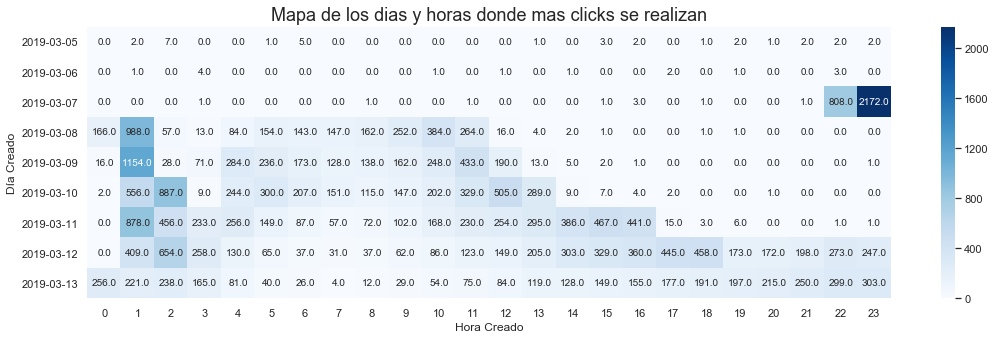

In [4]:
clicks['created'] = pd.to_datetime(clicks['created'])

clicks['hora_creado']=clicks['created'].dt.hour
clicks['dia_creado']=clicks['created'].dt.date
clicks['ocurrencias']=1
tabla=clicks[['dia_creado', 'hora_creado','ocurrencias']].groupby(['dia_creado','hora_creado']).count()
matriz = tabla.unstack().fillna(0)

#plt.pcolor(m,yticklabels=True,xticklabels=True, cmap='Reds')
fig, ax =mplt.subplots(figsize=(18,5))
title="Mapa de los días y horas donde mas clicks se realizan"
mplt.title(title,fontsize=18)
tit=ax.title
ax.set_xticks([])
ax.set_yticks([])
etiquetaX=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
sns.heatmap(matriz,xticklabels=etiquetaX,fmt="", cmap='Blues',ax=ax, annot=True);
mplt.xlabel("Hora Creado")
mplt.ylabel("Día Creado")
mplt.savefig('clicks_horas_y_dias.png', bbox_inches = 'tight')

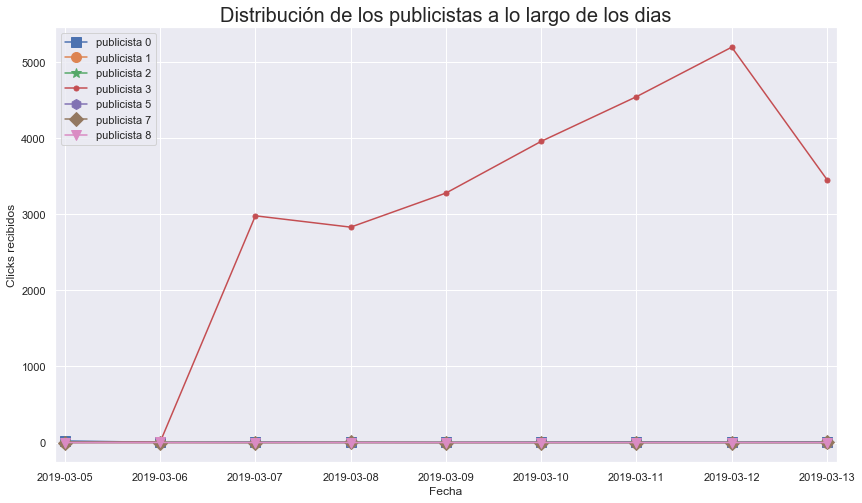

In [5]:

clicks['dia_creado']=clicks['created'].dt.date
tabla=clicks[['dia_creado','ocurrencias','advertiser_id']].groupby(['dia_creado','advertiser_id']).count()
tabla = tabla.unstack().fillna(0)

grafico=tabla.plot(figsize=(14, 8),ms=10.0, label='')
#disenio del grafico.
linea_graficos=grafico.get_lines()
linea_graficos[0].set_marker('s')
linea_graficos[1].set_marker('o')
linea_graficos[2].set_marker('*')
linea_graficos[3].set_marker('.')
linea_graficos[4].set_marker('h')
linea_graficos[5].set_marker('D')
linea_graficos[6].set_marker('v')
L=mplt.legend()
mplt.ylabel('Clicks recibidos')
mplt.xlabel('Fecha')
mplt.title("Distribución de los publicistas a lo largo de los días",fontsize=20)
L.get_texts()[0].set_text('publicista 0')
L.get_texts()[1].set_text('publicista 1')
L.get_texts()[2].set_text('publicista 2')
L.get_texts()[3].set_text('publicista 3')
L.get_texts()[4].set_text('publicista 5')
L.get_texts()[5].set_text('publicista 7')
L.get_texts()[6].set_text('publicista 8')
left, right =grafico.get_xlim();
grafico.set_xlim(left-0.1,right+0.1)
mplt.savefig('clicks_publicistas_y_dias.png', bbox_inches = 'tight')

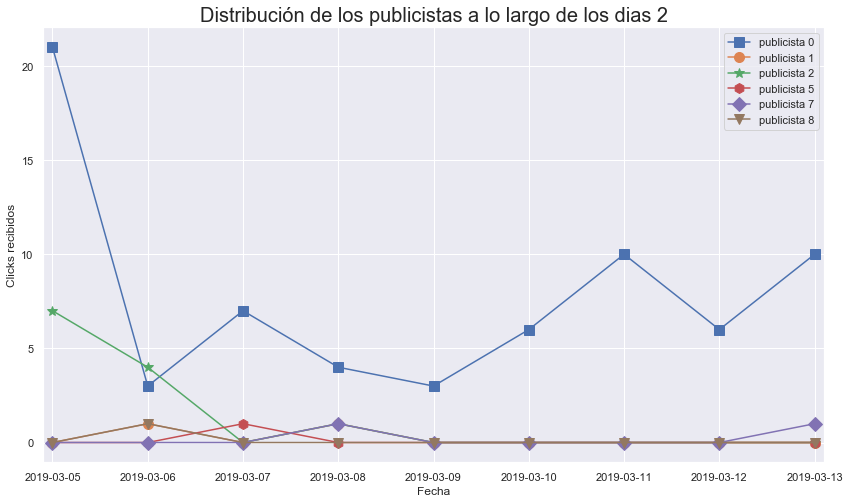

In [6]:
clicks_acotados=clicks[clicks['advertiser_id']!=3]
tabla=clicks_acotados[['dia_creado','ocurrencias','advertiser_id']].groupby(['dia_creado','advertiser_id']).count()
tabla = tabla.unstack().fillna(0)

grafico=tabla.plot(figsize=(14, 8),ms=10.0)

#cambiar estetica del grafico
linea_graficos=grafico.get_lines()
linea_graficos[0].set_marker('s')
linea_graficos[1].set_marker('o')
linea_graficos[2].set_marker('*')
linea_graficos[3].set_marker('h')
linea_graficos[4].set_marker('D')
linea_graficos[5].set_marker('v')   
    
    
L=mplt.legend()    
L.get_texts()[0].set_text('publicista 0')
L.get_texts()[1].set_text('publicista 1')
L.get_texts()[2].set_text('publicista 2')
L.get_texts()[3].set_text('publicista 5')
L.get_texts()[4].set_text('publicista 7')
L.get_texts()[5].set_text('publicista 8')
mplt.title("Distribución de los publicistas a lo largo de los días 2",fontsize=20)
mplt.ylabel('Clicks recibidos')
mplt.xlabel('Fecha')
left, right =grafico.get_xlim()
grafico.set_xlim(left-0.1,right+0.1)
mplt.savefig('clicks_horas_y_dias2.png', bbox_inches = 'tight')

In [7]:


bins = pd.IntervalIndex.from_tuples([ (0, 3), (3, 15), (15, 60), (60, 180),(180, 600),(600, 100000)])
#clicks_acotado['time_categ'] = pd.cut(clicks_acotado['timeToClick'],bins)
#clicks_acotado['time_categ'].cat.categories = ['muy tardio','tardio','medio','rapido','muy rapido','instantaneo']

clicks['time_categ'] = pd.cut(clicks['timeToClick'],bins)
clicks['time_categ'].cat.categories = ['0 a 3 seg','3 a 15 seg','15 a 60 seg','1 a 3 min','3 a 10 min','10 a 2000 min']



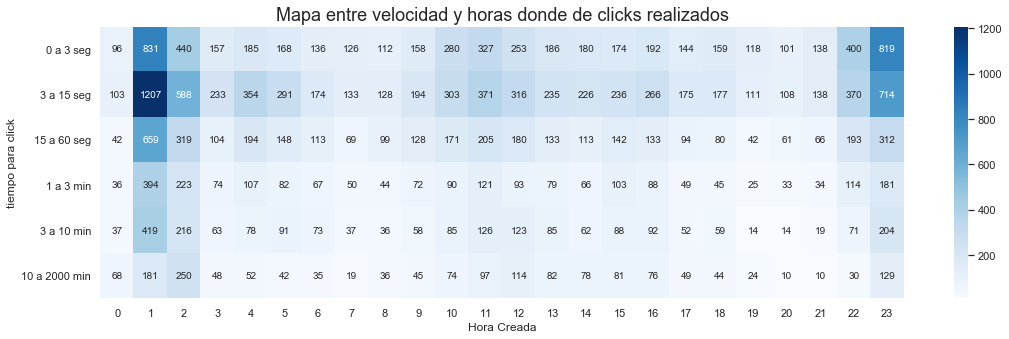

In [8]:
tabla=clicks[['time_categ', 'hora_creado','ocurrencias']].groupby(['time_categ','hora_creado']).count()
matriz = tabla.unstack()

#plt.pcolor(m,yticklabels=True,xticklabels=True, cmap='Reds')
fig, ax =mplt.subplots(figsize=(18,5))
title="Mapa entre velocidad y horas de clicks realizados"
mplt.title(title,fontsize=18)
tit=ax.title
ax.set_xticks([])
ax.set_yticks([])
etiquetaX=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
heatmap=sns.heatmap(matriz,xticklabels=etiquetaX,fmt="", cmap='Blues',ax=ax, annot=True);

mplt.xlabel("Hora Creada")
mplt.ylabel("tiempo para click")
mplt.savefig('clicks_horas_y_click_time.png', bbox_inches = 'tight')

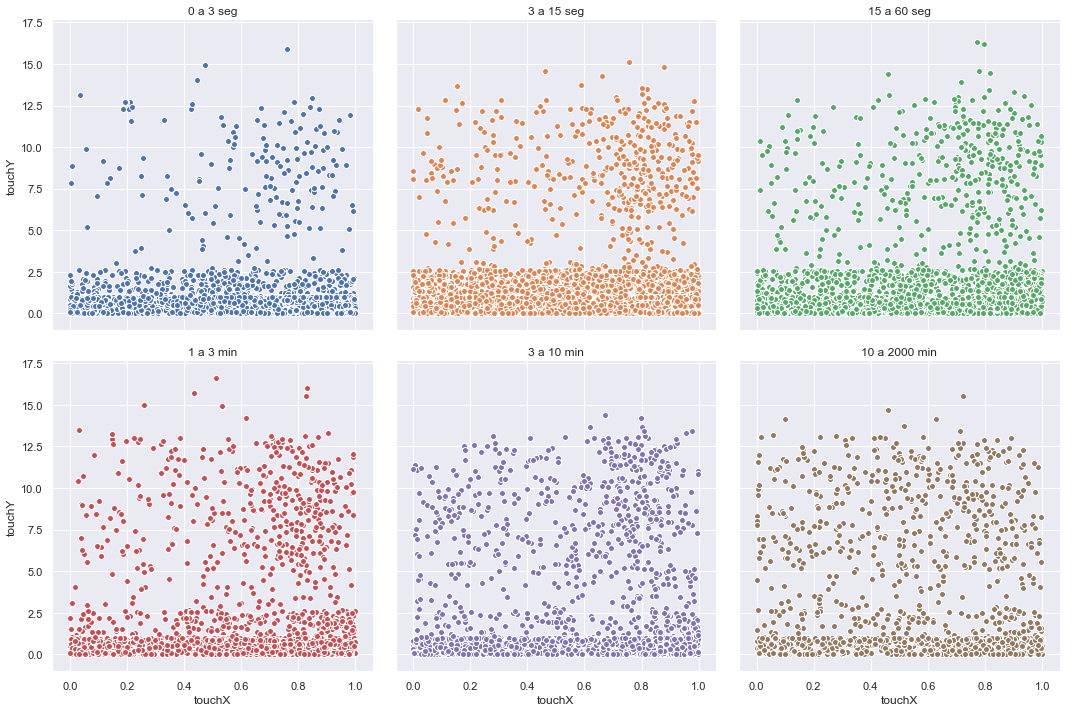

In [9]:
#fig, ax = mplt.subplots(figsize=(8,12.8))         # Sample figsize in inches
g = sns.FacetGrid(clicks, col="time_categ",col_wrap=3,hue="time_categ", height=5)
g.map(mplt.scatter, "touchX", "touchY", edgecolor="w")
#g.set_title("Comparacion de las posciciones de los clicks")
axes = g.axes.flatten()
#['10 a 2000 min','3 a 10 min','1 a 3 min','15 a 60 seg','3 a 15 seg','0 a 3 seg'
axes[5].set_title("10 a 2000 min")
axes[4].set_title("3 a 10 min")
axes[3].set_title("1 a 3 min")
axes[2].set_title("15 a 60 seg")
axes[1].set_title("3 a 15 seg")
axes[0].set_title("0 a 3 seg")

mplt.savefig('posicion_clicks_y_tiempo.png', bbox_inches = 'tight')

In [10]:
top_source=clicks['source_id'].value_counts().head(4).index
click_top_source=clicks[clicks["source_id"].isin(top_source)]
click_top_source['source_id'].value_counts()

0    17009
1     4298
6     3371
5     1628
Name: source_id, dtype: int64

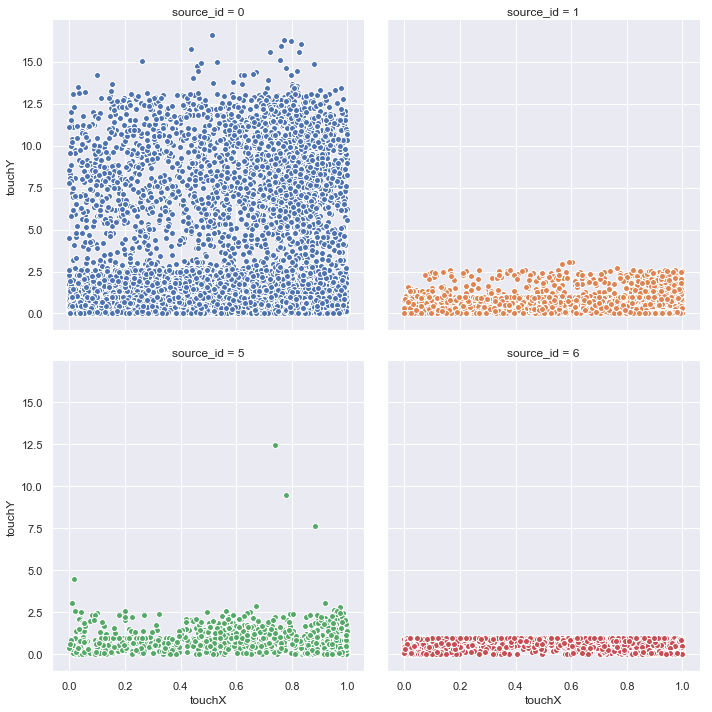

In [11]:
g = sns.FacetGrid(click_top_source, col="source_id",col_wrap=2,hue="source_id", height=5)
g.map(mplt.scatter, "touchX", "touchY", edgecolor="w")
#g.set_title("Comparacion de las posciciones de los clicks")
axes = g.axes.flatten()
mplt.savefig('posicion_clicks_y_surce.png', bbox_inches = 'tight')

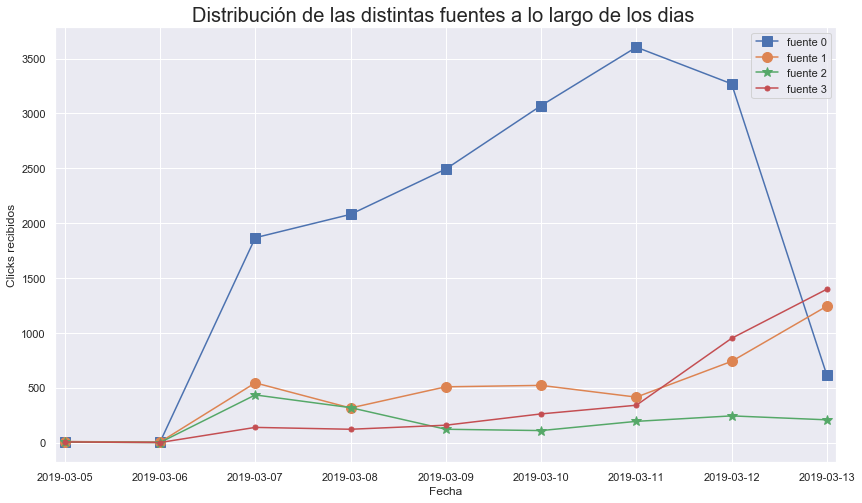

In [12]:
tabla=click_top_source[['dia_creado','ocurrencias','source_id']].groupby(['dia_creado','source_id']).count()
tabla = tabla.unstack().fillna(0)

grafico=tabla.plot(figsize=(14, 8),ms=10.0, label='')
#disenio del grafico.
linea_graficos=grafico.get_lines()
linea_graficos[0].set_marker('s')
linea_graficos[1].set_marker('o')
linea_graficos[2].set_marker('*')
linea_graficos[3].set_marker('.')

L=mplt.legend()
mplt.ylabel('Clicks recibidos')
mplt.xlabel('Fecha')
L.get_texts()[0].set_text('fuente 0')
L.get_texts()[1].set_text('fuente 1')
L.get_texts()[2].set_text('fuente 2')
L.get_texts()[3].set_text('fuente 3')
mplt.title("Distribución de las distintas fuentes a lo largo de los días ",fontsize=20)
left, right =grafico.get_xlim();
grafico.set_xlim(left-0.1,right+0.1)
mplt.savefig('clicks_source_y_dia.png', bbox_inches = 'tight')